In [122]:
import numpy as np
import matplotlib as mpl
import pandas as pd

import matplotlib.pyplot as plt

In [123]:
data_dir = '../data/'
fig_dir = '../figures/'

# Chapter 6: Comparison Study Plots

## Case 1: Poisson Equation

In [124]:
# Import data
data_elliptic_forest_adaptive = pd.read_csv(data_dir + 'case01-elliptic-forest-adaptive.csv')
data_elliptic_forest_uniform = pd.read_csv(data_dir + 'case01-elliptic-forest-uniform.csv')
data_thunderegg_adaptive = pd.read_csv(data_dir + 'case01-thunderegg-adaptive.csv')
data_petsc_cg_uniform = pd.read_csv(data_dir + 'case01-petsc-cg-uniform.csv')
data_petsc_gmres_uniform = pd.read_csv(data_dir + 'case01-petsc-gmres-uniform.csv')

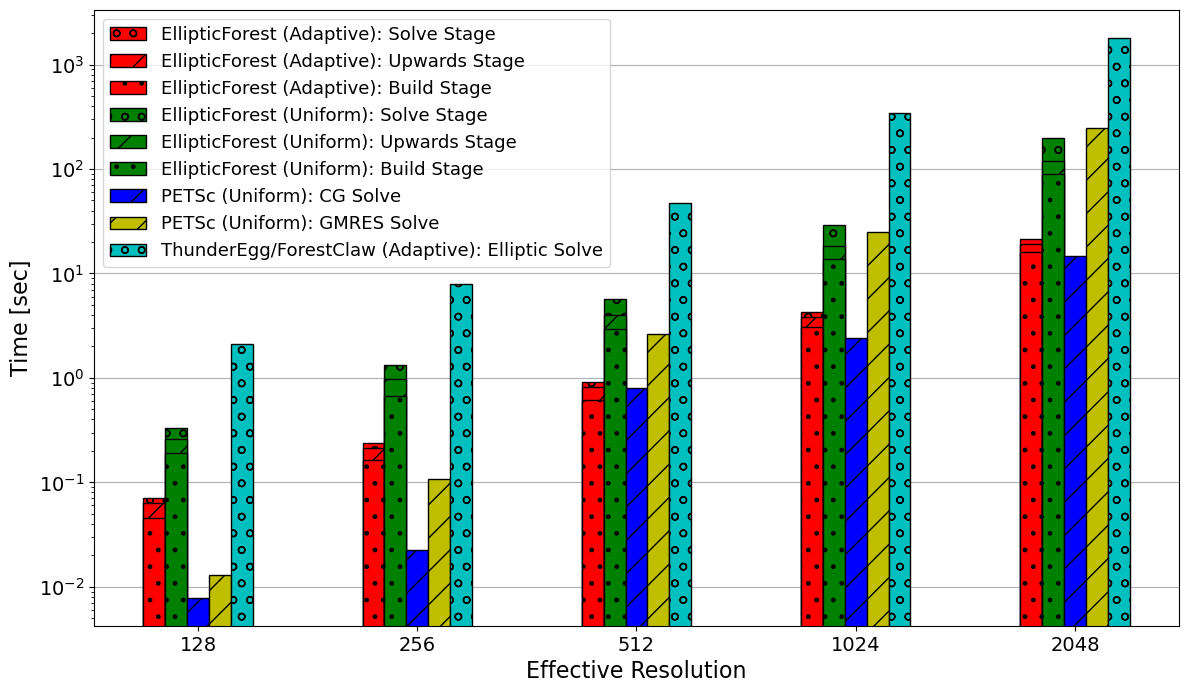

In [142]:
ef_adaptive_build_time = np.array(data_elliptic_forest_adaptive['build_time'])
ef_adaptive_upwards_time = np.array(data_elliptic_forest_adaptive['upwards_time'])
ef_adaptive_solve_time = np.array(data_elliptic_forest_adaptive['solve_time'])

ef_uniform_build_time = np.array(data_elliptic_forest_uniform['build_time'])
ef_uniform_upwards_time = np.array(data_elliptic_forest_uniform['upwards_time'])
ef_uniform_solve_time = np.array(data_elliptic_forest_uniform['solve_time'])

te_adaptive_solve_time = np.array(data_thunderegg_adaptive['elliptic_solve'])

petsc_cg_uniform_assembly_time = np.array(data_petsc_cg_uniform['assembly_time'])
petsc_cg_uniform_solve_time = np.array(data_petsc_cg_uniform['solve_time'])

petsc_gmres_uniform_assembly_time = np.array(data_petsc_gmres_uniform['assembly_time'])
petsc_gmres_uniform_solve_time = np.array(data_petsc_gmres_uniform['solve_time'])

fig, ax = plt.subplots(figsize=(14,8))

width = 0.1
offset = 0

ef_adaptive_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_adaptive_build_time + ef_adaptive_upwards_time + ef_adaptive_solve_time, 
        color='r', edgecolor='k', hatch='o', label='EllipticForest (Adaptive): Solve Stage', align='edge', width=width, log=True
    ),
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_adaptive_build_time + ef_adaptive_upwards_time,
        color='r', edgecolor='k', hatch='/', label='EllipticForest (Adaptive): Upwards Stage', align='edge', width=width, log=True
    ),
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_adaptive_build_time,
        color='r', edgecolor='k', hatch='.', label='EllipticForest (Adaptive): Build Stage', align='edge', width=width, log=True
    )
]

offset += width
ef_uniform_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time + ef_uniform_upwards_time + ef_uniform_solve_time, 
        color='g', edgecolor='k', hatch='o', label='EllipticForest (Uniform): Solve Stage', align='edge', width=width, log=True
    ),
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time + ef_uniform_upwards_time,
        color='g', edgecolor='k', hatch='/', label='EllipticForest (Uniform): Upwards Stage', align='edge', width=width, log=True
    ),
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time,
        color='g', edgecolor='k', hatch='.', label='EllipticForest (Uniform): Build Stage', align='edge', width=width, log=True
    )
]

offset += width
petsc_cg_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, petsc_cg_uniform_solve_time, 
        color='b', edgecolor='k', hatch='/', label='PETSc (Uniform): CG Solve', align='edge', width=width, log=True
    )
]

offset += width
petsc_gmres_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, petsc_gmres_uniform_solve_time, 
        color='y', edgecolor='k', hatch='/', label='PETSc (Uniform): GMRES Solve', align='edge', width=width, log=True
    )
]

offset += width
te_uniform_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, te_adaptive_solve_time, 
        color='c', edgecolor='k', hatch='o', label='ThunderEgg/ForestClaw (Adaptive): Elliptic Solve', align='edge', width=width, log=True
    )
]

ax.set_xlabel('Effective Resolution', size=16)
ax.set_xticks(np.array([0, 1, 2, 3, 4]) + 0.25)
ax.set_xticklabels([128, 256, 512, 1024, 2048])

ax.set_ylabel('Time [sec]', size=16)
ax.tick_params(axis='both', labelsize=14)

ax.legend(prop={'size':13})
ax.grid(axis='y', which='major')
ax.set_axisbelow(True)

# ax.set_title('Poisson Equation Solve Comparison')

plt.savefig(fig_dir + 'case01-stacked-bar-plot-comparisons-no-title.pdf')
plt.savefig(fig_dir + 'case01-stacked-bar-plot-comparisons-no-title.png')


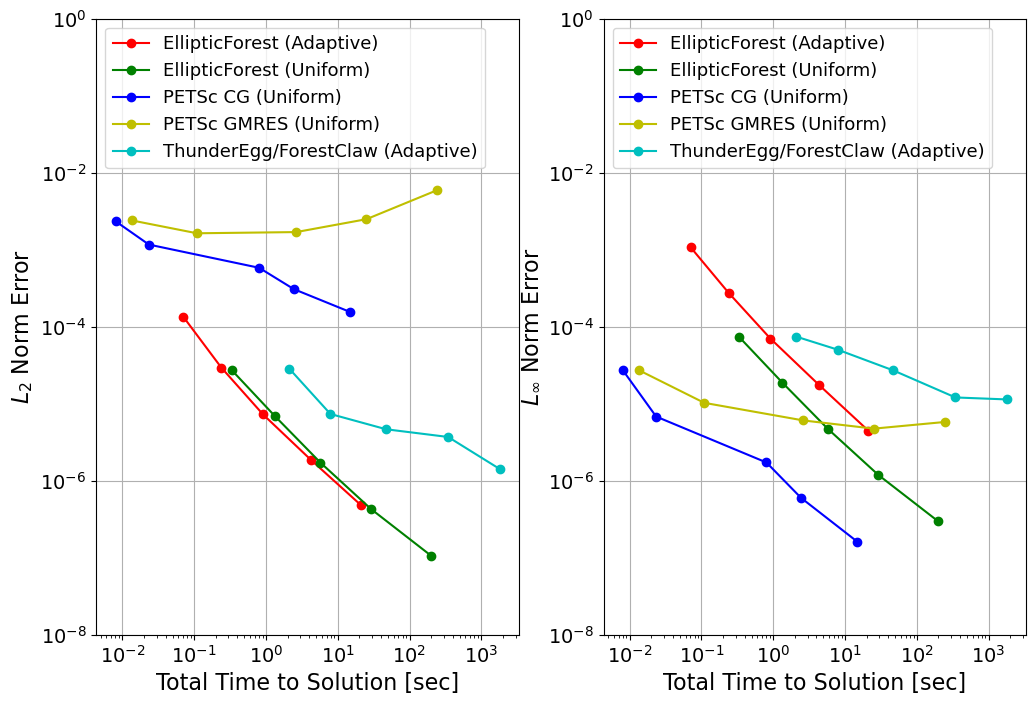

In [146]:
ef_adaptive_l1_error = np.array(data_elliptic_forest_adaptive['l1_error'])
ef_adaptive_l2_error = np.array(data_elliptic_forest_adaptive['l2_error'])
ef_adaptive_lI_error = np.array(data_elliptic_forest_adaptive['lI_error'])
ef_adaptive_total_time = np.array(data_elliptic_forest_adaptive['total_time'])

ef_uniform_l1_error = np.array(data_elliptic_forest_uniform['l1_error'])
ef_uniform_l2_error = np.array(data_elliptic_forest_uniform['l2_error'])
ef_uniform_lI_error = np.array(data_elliptic_forest_uniform['lI_error'])
ef_uniform_total_time = np.array(data_elliptic_forest_uniform['total_time'])

te_adaptive_l1_error = np.array(data_thunderegg_adaptive['l1_error'])
te_adaptive_l2_error = np.array(data_thunderegg_adaptive['l2_error'])
te_adaptive_lI_error = np.array(data_thunderegg_adaptive['lI_error'])
te_adaptive_total_time = np.array(data_thunderegg_adaptive['total_time'])

petsc_cg_uniform_l1_error = np.array(data_petsc_cg_uniform['l1_error'])
petsc_cg_uniform_l2_error = np.array(data_petsc_cg_uniform['l2_error'])
petsc_cg_uniform_lI_error = np.array(data_petsc_cg_uniform['lI_error'])
petsc_cg_uniform_total_time = np.array(data_petsc_cg_uniform['total_time'])

petsc_gmres_uniform_l1_error = np.array(data_petsc_gmres_uniform['l1_error'])
petsc_gmres_uniform_l2_error = np.array(data_petsc_gmres_uniform['l2_error'])
petsc_gmres_uniform_lI_error = np.array(data_petsc_gmres_uniform['lI_error'])
petsc_gmres_uniform_total_time = np.array(data_petsc_gmres_uniform['total_time'])

fig, axs = plt.subplots(1, 2, figsize=(12,8))

axs[0].loglog(ef_adaptive_total_time, ef_adaptive_l2_error, 'r-o', label='EllipticForest (Adaptive)')
axs[0].loglog(ef_uniform_total_time, ef_uniform_l2_error, 'g-o', label='EllipticForest (Uniform)')
axs[0].loglog(petsc_cg_uniform_total_time, petsc_cg_uniform_l2_error, 'b-o', label='PETSc CG (Uniform)')
axs[0].loglog(petsc_gmres_uniform_total_time, petsc_gmres_uniform_l2_error, 'y-o', label='PETSc GMRES (Uniform)')
axs[0].loglog(te_adaptive_total_time, te_adaptive_l2_error, 'c-o', label='ThunderEgg/ForestClaw (Adaptive)')

axs[0].set_ylim([1e-8, 1e0])
axs[0].set_xlabel('Total Time to Solution [sec]', size=16)
axs[0].set_ylabel(r'$L_2$ Norm Error', size=16)
axs[0].legend(loc='upper left', prop={'size':13})
axs[0].tick_params(axis='both', labelsize=14)
axs[0].grid()

axs[1].loglog(ef_adaptive_total_time, ef_adaptive_lI_error, 'r-o', label='EllipticForest (Adaptive)')
axs[1].loglog(ef_uniform_total_time, ef_uniform_lI_error, 'g-o', label='EllipticForest (Uniform)')
axs[1].loglog(petsc_cg_uniform_total_time, petsc_cg_uniform_lI_error, 'b-o', label='PETSc CG (Uniform)')
axs[1].loglog(petsc_gmres_uniform_total_time, petsc_gmres_uniform_lI_error, 'y-o', label='PETSc GMRES (Uniform)')
axs[1].loglog(te_adaptive_total_time, te_adaptive_lI_error, 'c-o', label='ThunderEgg/ForestClaw (Adaptive)')

axs[1].set_ylim([1e-8, 1e0])
axs[1].set_xlabel('Total Time to Solution [sec]', size=16)
axs[1].set_ylabel(r'$L_{\infty}$ Norm Error', size=16)
axs[1].legend(loc='upper left', prop={'size':13})
axs[1].tick_params(axis='both', labelsize=14)
axs[1].grid()

# plt.suptitle('Work-Precision Plots for Poisson Equation Solve', size=16)
# plt.subplots_adjust(top=0.90)
plt.savefig(fig_dir + 'case01-work-precision-plots-no-title.pdf')
plt.savefig(fig_dir + 'case01-work-precision-plots-no-title.png')